In [1]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

import scipy
import numpy as np
from scipy import interpolate
from io import StringIO

# Reading data

CSV format

In [2]:
#from bigfloat import *

def isNaN(string):
    return string != string
print(isNaN("hello"))
print(isNaN(np.nan))

False
True


Muninn format

In [3]:
res=1
vars=["m", "beta", "psi", "derpsi"]
time=[]
mori=[]
mscri=[]
betaori=[]
betascri=[]
psiori=[]
psiscri=[]
derpsiori=[]
derpsiscri=[]
k=1

for var in vars:
    
    
    dir = "/home/rita13santos/Desktop/run9/{}.txt".format(var)
    
    
    print(dir)

    with open(dir) as f:
        i=0
        for line in f:
            i=i+1
            a=line.split()
            #print("i = ", i, " a = ", a)
            
            
            
            #a=line.split()
            
            if k==1:
                time.append(float(a[0]))
                mori.append(float(a[1]))
                mscri.append(float(a[2]))
            elif k==2:
                betaori.append(float(a[1]))
                betascri.append(float(a[2]))
            elif k==3:
                psiori.append(float(a[1]))
                psiscri.append(float(a[2]))
            elif k==4:
                derpsiori.append(float(a[1]))
                derpsiscri.append(float(a[2]))
                
                
                    
    k=k+1

#count=len(datatime[2])+1
#count

/home/rita13santos/Desktop/run9/m.txt
/home/rita13santos/Desktop/run9/beta.txt
/home/rita13santos/Desktop/run9/psi.txt
/home/rita13santos/Desktop/run9/derpsi.txt


####

# Styling plots

In [4]:
plt.rcParams.update({'font.size': 12})

# Plotting data with resolutions 1 and 2 and differences 

Value of Derpsi at the origin over time

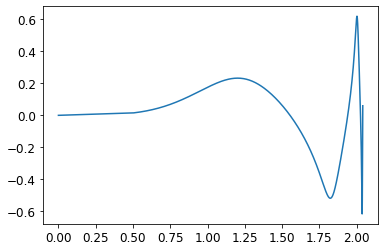

In [5]:
plt.plot(time, derpsiori)

Finding zero crossings

In [14]:
from scipy.interpolate import UnivariateSpline

spl = UnivariateSpline(time, derpsiori, s=0)

roots=spl.roots()
print("Number of zero crossing is ",len(roots))
print(roots[k:(k+3)+1])

k=0
tau_star=(roots[0+k]*roots[3+k]-roots[1+k]*roots[2+k])/(roots[0+k]-roots[1+k]-roots[2+k]+roots[3+k])
print("\nTau star is ", tau_star)

Number of zero crossing is  4
[1.09567874e-22 1.55251971e+00 1.93949598e+00 2.02472325e+00]

Tau star is  2.05215105842236


In [15]:
#adapt_time = [-math.log(abs((tau_star-x))) for x in time[0:len(time)-1]]#0:len(time)-step:step]] #ignoring last timestep, where log(0)

adapt_time=[]

for x in time:
    if x<=tau_star:
        adapt_time.append(-math.log(abs((tau_star-x))))

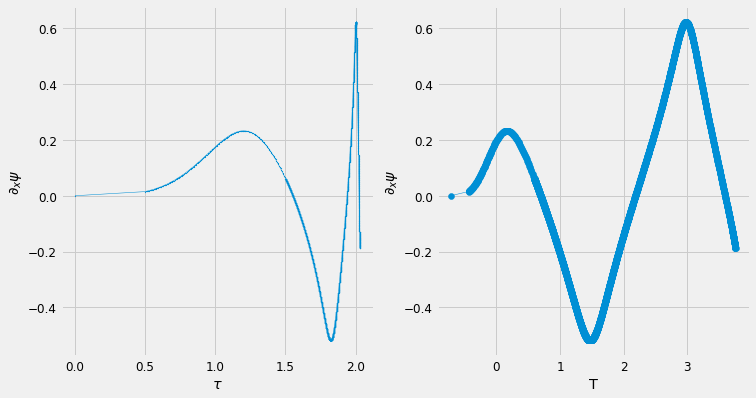

In [17]:
with plt.style.context('fivethirtyeight'):
    plt.rcParams.update({'font.size': 12})    
    plt.rcParams["figure.figsize"] = (7,5)
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))

    ax1.plot(time,derpsiori,linewidth=0.5)
    ax1.scatter(time,derpsiori,s=0.5)
    ax1.set_xlabel("$\u03C4$")
    ax1.set_ylabel("$\partial_x \psi$")
    #ax1.set_xlim([2.04,2.05])
    
    ax2.plot(adapt_time,derpsiori[0:len(adapt_time)],linewidth=0.5)
    ax2.scatter(adapt_time,derpsiori[0:len(adapt_time)],linewidth=0.5)
    ax2.set_xlabel("T")
    ax2.set_ylabel("$\partial_x \psi$")
    
    
    
    plt.show()

Central time and Bondi time relation

2.05215105842236

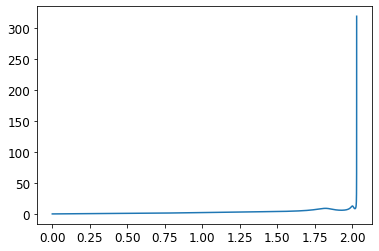

In [18]:
bonditime =[]
for i in range(0, len(time)):
    t=time[i]*np.exp(2*betascri[i])
    bonditime.append(t)
    
plt.plot(time,bonditime)
#plt.xlim([2,2.05])
tau_star

News function

ValueError: x and y must have same first dimension, but have shapes (3686,) and (3685,)

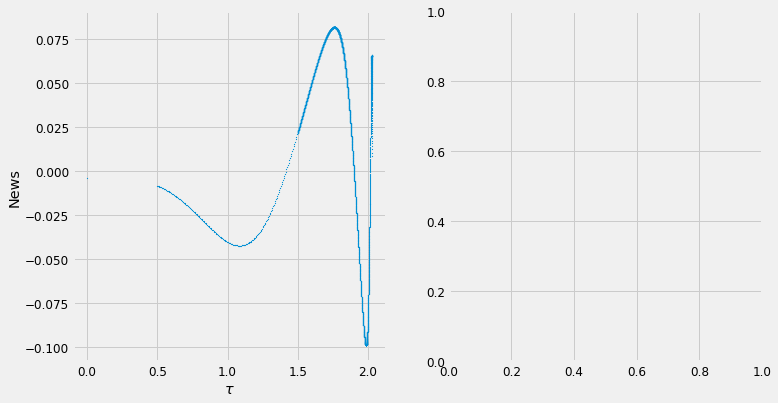

In [20]:
news=[]
for i in range(0, len(psiscri)-1):
    new=np.exp(-2*betascri[i])*(psiscri[i+1]-psiscri[i])/(time[i+1]-time[i])##eq.59 from my report ref eq:news
    news.append(new)

    
with plt.style.context('fivethirtyeight'):
    plt.rcParams.update({'font.size': 12})    
    plt.rcParams["figure.figsize"] = (7,5)
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))

    ax1.scatter(time[0:len(news)],news,s=0.5)
    ax1.set_xlabel("$\u03C4$")
    ax1.set_ylabel("News")
    
    ax2.plot(adapt_time[0:len(adapt_time)],news[0:len(adapt_time)],linewidth=0.5)
    ax2.set_xlabel("T")
    ax2.set_ylabel("News")
    
    
    
    plt.show()

Monitor ratio over time

In [23]:
L=len(m[0])

monitor_ratio=[]
for t in range(0,len(m)-1):
    aux=[]
    for x in range(4,L-3):
        aux.append(2*m[t][x]*(1-grid[t][x])/grid[t][x])
    monitor_ratio.append(max(aux))
    

with plt.style.context('fivethirtyeight'):
    #plt.plot(time[0:len(time)-1],monitor_ratio,linewidth=0.5)
    plt.plot(adapt_time,monitor_ratio[0:len(adapt_time)],linewidth=0.5)
    plt.ylabel("max(2m/r)")
    plt.show()

NameError: name 'm' is not defined

$\beta$ at scri+

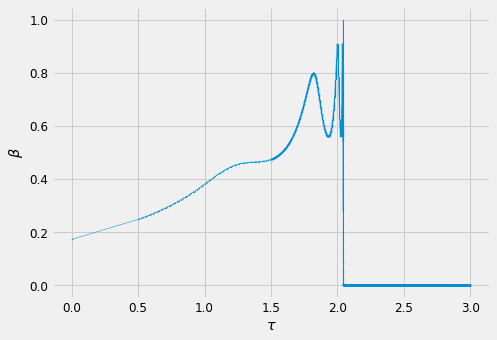

In [24]:

with plt.style.context('fivethirtyeight'):
    
    plt.rcParams.update({'font.size': 12})    
    plt.rcParams["figure.figsize"] = (7,5)  
    plt.xlabel("$\u03C4$")#T
    plt.ylabel(r'$ \beta $')
    plt.plot(time,betascri,linewidth=0.5)
    plt.scatter(time,betascri,s=0.5)
    #plt.plot(adapt_time,mplt[0:len(adapt_time)],linewidth=0.5)
    #plt.xlim([1,1.05])
    plt.show()

Redshift factor

In [25]:
redshift=[]
for i in range(0, len(beta)):
    redshift.append(math.exp(2*beta[i][len(beta[0])-4])-1) #saving derpsi at the origin for each timestep

    
with plt.style.context('fivethirtyeight'):
    plt.rcParams.update({'font.size': 12})    
    plt.rcParams["figure.figsize"] = (7,5)
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))

    ax1.plot(time,redshift,linewidth=0.5)
    ax1.scatter(time,redshift,s=0.5)
    ax1.set_xlabel("$\u03C4$")
    ax1.set_ylabel("Redshift factor")
    
    ax2.plot(adapt_time[0:len(adapt_time)],redshift[0:len(adapt_time)],linewidth=0.5)
    ax2.set_xlabel("T")
    ax2.set_ylabel("Redshift factor")
    
    
    
    plt.show()

NameError: name 'beta' is not defined

Bondi mass at scri+

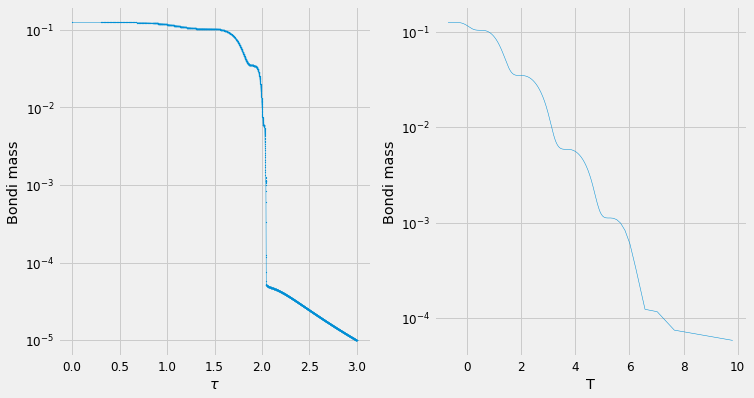

In [70]:
mplt=[]
for i in range(0, len(derpsi)):
    mplt.append(m[i][len(m[0])-4]) #saving derpsi at the origin for each timestep

with plt.style.context('fivethirtyeight'):
    
    plt.rcParams.update({'font.size': 12})    
    plt.rcParams["figure.figsize"] = (7,5)
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))
    
    
    
    
    # time
    ax1.scatter(time,mplt,s=0.5)
    ax1.plot(time,mplt,linewidth=0.5)
    ax1.set_ylabel("Bondi mass")
    #ax1.set_xlim([.8,1.04])
    #ax1.set_ylim([-0.001,0.002])
    ax1.set_yscale('log')
    ax1.set_xlabel("$\u03C4$")#T
    
    # adapt time
    
    ax2.plot(adapt_time,np.array(mplt[0:len(adapt_time)]),linewidth=0.5)
    ax2.set_yscale('log')
    #ax2.set_xlim([2.55,2.6])
    #ax2.set_ylim([-0.001,0.001])
    ax2.set_ylabel("Bondi mass")
    ax2.set_xlabel("T")
    
    plt.show()

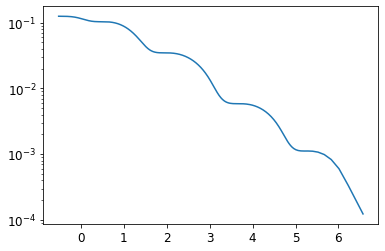

In [84]:
plt.plot(adapt_time[10:len(adapt_time)-3],np.array(mplt[10:len(adapt_time)-3]))
plt.yscale('log')

In [1]:
#import numpy as np

#import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

def func(x,a,b):
    return a + b*x

In [3]:
import numpy as np
f=np.vectorize(func)


# fit
guess = [0.1,-0.5]

pars, cov = curve_fit(f, adapt_time[10:len(adapt_time)-3],np.array(mplt[10:len(adapt_time)-3]), p0=guess, maxfev=5000)

pars

#plt.plot(t[600:1400], f(t[600:1400],pars[0],pars[1],pars[2],pars[3]))
#plt.scatter(t[600:1400],monitor_ratio[600:1400])
#plt.show()

NameError: name 'adapt_time' is not defined

psi(tau)

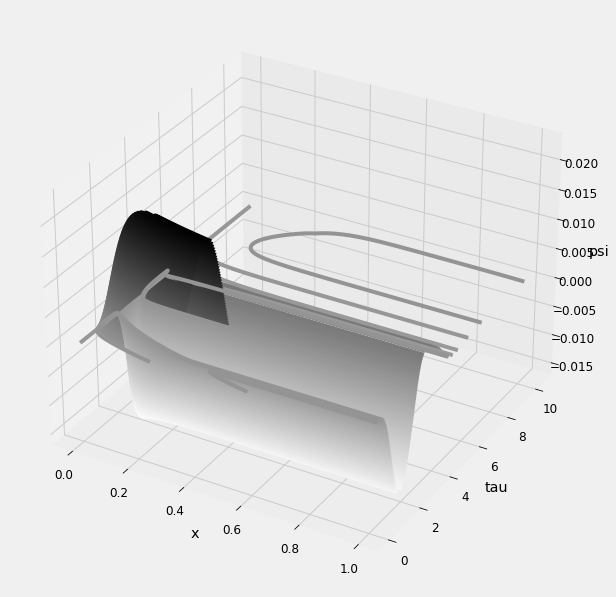

In [30]:
x = grid[0][3:len(grid[0])-3]
y = t

X, Y = np.meshgrid(x, y)

Z = []

for i in range(0,len(y)):
    Z.append(psi[i][3:len(grid[0])-3])

with plt.style.context('fivethirtyeight'):
    
    plt.rcParams.update({'font.size': 12})    
    plt.rcParams["figure.figsize"] = (10,10)  

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y, Z, 100, cmap='binary')
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('psi');